# Linear and Polynomial Regressions (practice)

**Author**: [Gilyoung Cheong](https://www.linkedin.com/in/gycheong/)

We use the [dataset about Walmart sales from Kaggle by mikhail1681](https://www.kaggle.com/datasets/mikhail1681/walmart-sales?select=Walmart_sales.csv) to implement linear regression and polynomial regression models in practice. We will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/) for manipulating dataframes.
*   [`numpy`](https://numpy.org/) for various mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/) for applying machine learning algorithms.
*   [`seaborn`](https://seaborn.pydata.org/) for data visualization.
*   [`matplotlib`](https://matplotlib.org/) for additional plotting.

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns # apparently named after Samuel Norman Seaborn: https://stackoverflow.com/questions/41499857/why-import-seaborn-as-sns
import matplotlib.pyplot as plt

In [21]:
# Sample description of the data

url = "https://raw.githubusercontent.com/gycheong/machine_learning/main/Walmart_sales.csv"
df = pd.read_csv(url)
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
5179,37,10-09-2010,510296.07,1,80.58,2.565,210.264116,8.360
2065,15,22-04-2011,655318.26,0,41.37,4.061,134.357100,7.658
1128,8,13-07-2012,890488.01,0,78.46,3.256,225.483114,5.401
2859,20,26-10-2012,2031650.55,0,60.04,3.882,216.151590,7.293
4225,30,05-08-2011,431798.64,0,94.22,3.684,215.197852,7.852


In [22]:
# Data types

df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

From above, we see that our dataframe (i.e., the object df) has the following parameters. Descriptions are from [mikhail1681, the owner of the data](https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data).

| Parameter | Description | Content type |
|---|----|---|
| Store | Store number | integer |
| Date | Sales week start date | integer |
| Weekly_Sales | Sales | float |
| Holiday_Flag | Mark on the presence or absence of a holiday | integer (0 or 1) |
| Temperature | Air temperature in the region | float |
| Fuel_Price | Fuel cost in the region (USD) | float | 
| CPI | Consumer price index | float |
| Unemployment | Unemployment rate | float |

## Setting the goal

We want to construct a linear regression model and polynomial regression models (of several degrees) whose 
* input data are "Store", "Temperature", "Fuel_Price", "CPI", and "Unemployment" 
* and output data is "Weekly_Sales".

In [23]:
# We check if there are any NaN (not a number) values

print(df.isna().sum()) 

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


## Scatter Plots

Let's make brief scatter plots to see how each input feature may be related to the output feature.

(0.0, 3999121.46)

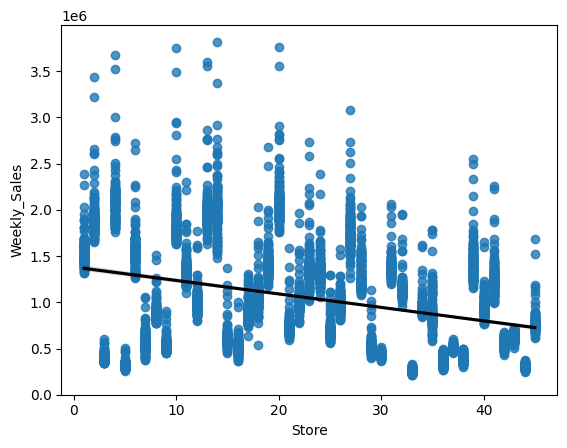

In [24]:
sns.regplot(x = "Store", y = "Weekly_Sales", data = df, line_kws = {"color" : "black"})
plt.ylim(0,)

(0.0, 3999121.46)

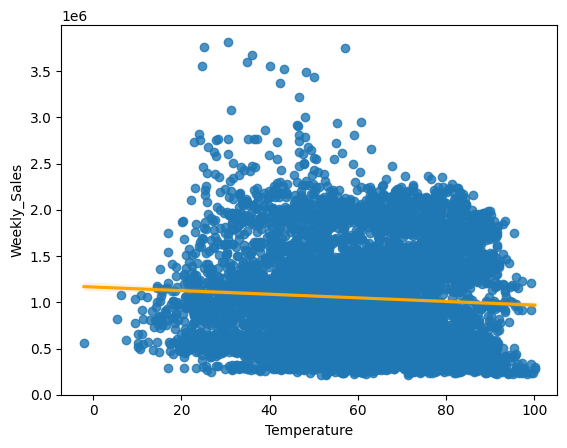

In [25]:
sns.regplot(x = "Temperature", y = "Weekly_Sales", data = df, line_kws = {"color" : "orange"})
plt.ylim(0,)

(0.0, 3999121.46)

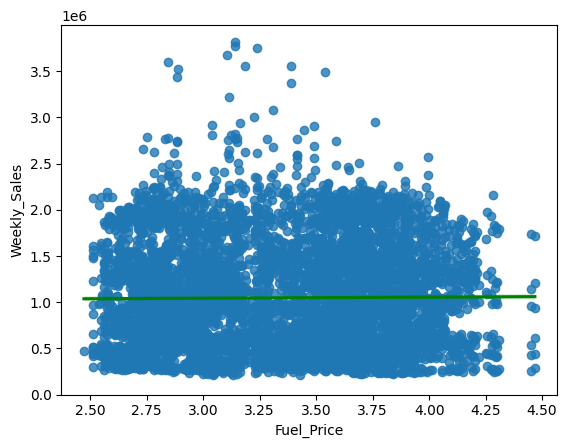

In [26]:
sns.regplot(x = "Fuel_Price", y = "Weekly_Sales", data = df, line_kws = {"color" : "green"})
plt.ylim(0,)

(0.0, 3999121.46)

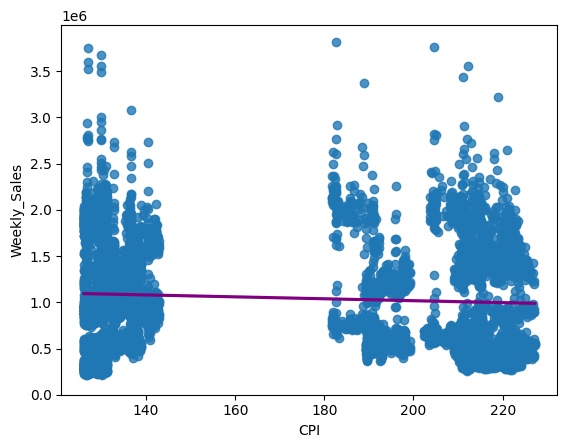

In [27]:
sns.regplot(x = "CPI", y = "Weekly_Sales", data = df, line_kws = {"color" : "purple"})
plt.ylim(0,)

(0.0, 3999121.46)

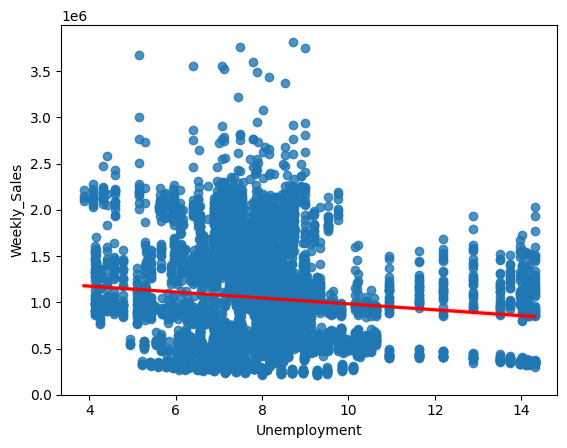

In [28]:
sns.regplot(x = "Unemployment", y = "Weekly_Sales", data = df, line_kws = {"color" : "red"})
plt.ylim(0,)


## Building Linear Regression Model

In [29]:
x_data = df[["Store", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
y_data = df[["Weekly_Sales"]]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

# We use 80% of our data for training and 20% of our data for testing

print("number of training samples:", x_train.shape[0])
print("number of test samples:", x_test.shape[0])

lr = LinearRegression()
lr.fit(x_train, y_train) # training the model (computed as in the theory discussion)


number of training samples: 5148
number of test samples: 1287


LinearRegression()

In [31]:
a = lr.intercept_
b = lr.coef_

# Our model is given by 
# a + b[0] * "Store" + b[1] * "Temperature" + b[2] "Fuel_Price" + b[3] * "CPI" + b[4] * "Unemployment"

print(a[0])
print(b[0])

2025597.3266168814
[-15277.50438502   -838.89915397   4547.08788125  -2375.34469744
 -23525.040141  ]


### $R^2$ score (coefficient of determination)

A common measure to test whether output $\boldsymbol{\hat{y}} = (\hat{y}_1, \dots, \hat{y}_n)$ from the suggested model works well is to use the **$R^2$ score** (or the **coefficent of determiantion**) $\boldsymbol{y}$ against $\boldsymbol{\hat{y}}$, defined as follows:
$$R^2(\boldsymbol{y}, \boldsymbol{\hat{y}}) := 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{\boldsymbol{y}})^2}.$$

**Remark**. For now, we just note that the closer the $R^2$ score is to $1$ (on the test dataset), the better our model is. We also note that reversing the order of $\boldsymbol{y}$ and $\boldsymbol{\hat{y}}$ generally leads to a different quantity.

In [32]:
yhat = lr.predict(x_test) # given by plugging in our test value into the model we developed above
print("The value of R^2 (using .score):", lr.score(x_test, y_test))
print("The value of R^2 (using r2_score):", r2_score(y_test, yhat))

# The computed R^2 scores indicate that maybe it is not the best to use the linear regression

The value of R^2 (using .score): 0.1355744727160133
The value of R^2 (using r2_score): 0.1355744727160133


## Building Polynomial Regression Models

We now start building polynomial regression models. We shall first start with the case where degree is 1, which should give the same result as the linear regression we tried above.

In [33]:
poly1 = PolynomialFeatures(degree=1)

x_train_pr1 = poly1.fit_transform(x_train)
y_train_pr1 = poly1.fit_transform(y_train)

x_test_pr1 = poly1.fit_transform(x_test)
y_test_pr1 = poly1.fit_transform(y_test)

In [37]:
pr1 = LinearRegression()
pr1.fit(x_train_pr1, y_train_pr1)

yhat_pr1 = pr1.predict(x_test_pr1)

print("The value of R^2:", r2_score(y_test_pr1, yhat_pr1))


The value of R^2: 0.5677872363580061


**Question**. Why does the above $R^2$ score not match the $R^2$ score of the linear regression?

**Answer**. This is because x_train_pr1 contains extra $1$ in the beginning (and similarly to the other degree $1$ polynomial features).

In [38]:
print("Training polynomial features with degree 1: \n\n", x_train_pr1)

print("\nTraining features: \n\n", x_train)

Training polynomial features with degree 1: 

 [[  1.         25.         36.73        3.582     207.1882876   7.343    ]
 [  1.          3.         87.67        3.523     219.0866908   7.567    ]
 [  1.          6.         68.53        3.353     219.0740167   6.551    ]
 ...
 [  1.         28.         84.51        4.11      131.0983226  11.627    ]
 [  1.          2.         59.33        3.297     217.6455387   7.441    ]
 [  1.         37.         68.54        2.77      209.400638    8.464    ]]

Training features: 

       Store  Temperature  Fuel_Price         CPI  Unemployment
3489     25        36.73       3.582  207.188288         7.343
367       3        87.67       3.523  219.086691         7.567
804       6        68.53       3.353  219.074017         6.551
4087     29        69.14       3.809  136.274581         9.863
4667     33        71.91       3.828  129.805194         8.010
...     ...          ...         ...         ...           ...
905       7        13.76       2.

In [73]:
# Erasing the 1's give the same result as in the linear regression:

x_train_prx = np.delete(x_train_pr1, [0], axis=1)
y_train_prx = np.delete(y_train_pr1, [0], axis=1)

x_test_prx = np.delete(x_test_pr1, [0], axis=1)
y_test_prx = np.delete(y_test_pr1, [0], axis=1)

prx = LinearRegression()
prx.fit(x_train_prx, y_train_prx)

yhat_prx = prx.predict(x_test_prx)

print("The value of R^2:", r2_score(y_test_prx, yhat_prx))

The value of R^2: 0.13557447271601308


In [74]:
# degree 2

poly2 = PolynomialFeatures(degree=2)

x_train_pr2 = poly2.fit_transform(x_train)
y_train_pr2 = poly2.fit_transform(y_train)

x_test_pr2 = poly2.fit_transform(x_test)
y_test_pr2 = poly2.fit_transform(y_test)

# Erasing the 1's:

x_train_pr2 = np.delete(x_train_pr2, [0], axis=1)
y_train_pr2 = np.delete(y_train_pr2, [0], axis=1)

x_test_pr2 = np.delete(x_test_pr2, [0], axis=1)
y_test_pr2 = np.delete(y_test_pr2, [0], axis=1)

pr2 = LinearRegression()
pr2.fit(x_train_pr2, y_train_pr2)
yhat_pr2 = pr2.predict(x_test_pr2)

print("The value of (less meaningful) R^2:", r2_score(y_test_pr2, yhat_pr2))


print(x_test_pr1.shape)
print(x_test_pr2.shape)

The value of (less meaningful) R^2: 0.25531351005929265
(1287, 6)
(1287, 20)


In [75]:
print(yhat_prx.shape)
print(yhat_pr1.shape)
print(yhat_pr2.shape)
print(y_test_pr2.shape)
print(y_test.shape)
print(y_test)
print(yhat_pr2)

# The result shows that only column 0 should be kept from yhat_pr2 (i.e., erase column 1)

(1287, 1)
(1287, 2)
(1287, 2)
(1287, 2)
(1287, 1)
      Weekly_Sales
447     1870619.23
2196     448391.99
3253    1272948.27
2873     744969.42
712      325345.41
...            ...
5523    1465283.29
2646    1440785.70
6338    1682862.03
5756    1133913.33
6239     306336.07

[1287 rows x 1 columns]
[[1.89467711e+06 3.65129128e+12]
 [9.85719359e+05 1.32272604e+12]
 [1.29692688e+06 1.88336050e+12]
 ...
 [9.12277825e+05 1.07159325e+12]
 [8.49669555e+05 7.95756318e+11]
 [6.90548659e+05 4.99190056e+11]]


In [76]:
yhat_pr2x = np.delete(yhat_pr2, [1], axis=1)

print()
print("The value of R^2:", r2_score(y_test, yhat_pr2x))

# Note that the model improved!


The value of R^2: 0.27181919040700664


## Repeating the same process for degree 3

In [78]:
# degree 3

poly3 = PolynomialFeatures(degree=3)

x_train_pr3 = poly3.fit_transform(x_train)
y_train_pr3 = poly3.fit_transform(y_train)

x_test_pr3 = poly3.fit_transform(x_test)
y_test_pr3 = poly3.fit_transform(y_test)

# Erasing the 1's:

x_train_pr3 = np.delete(x_train_pr3, [0], axis=1)
y_train_pr3 = np.delete(y_train_pr3, [0], axis=1)

x_test_pr3 = np.delete(x_test_pr3, [0], axis=1)
y_test_pr3 = np.delete(y_test_pr3, [0], axis=1)

pr3 = LinearRegression()
pr3.fit(x_train_pr3, y_train_pr3)
yhat_pr3 = pr3.predict(x_test_pr3)

print("The value of (less meaningful) R^2:", r2_score(y_test_pr3, yhat_pr3))


print(x_test_pr1.shape)
print(x_test_pr2.shape)
print(x_test_pr3.shape)

The value of (less meaningful) R^2: 0.32140008447986645
(1287, 6)
(1287, 20)
(1287, 55)


In [82]:
print(y_test)
print(y_test_pr3)

# The result shows that only column 0 should be kept from yhat_pr3 (i.e., erase column 1, 2)

      Weekly_Sales
447     1870619.23
2196     448391.99
3253    1272948.27
2873     744969.42
712      325345.41
...            ...
5523    1465283.29
2646    1440785.70
6338    1682862.03
5756    1133913.33
6239     306336.07

[1287 rows x 1 columns]
[[1.87061923e+06 3.49921630e+12 6.54570131e+18]
 [4.48391990e+05 2.01055377e+11 9.01516205e+16]
 [1.27294827e+06 1.62039730e+12 2.06268194e+18]
 ...
 [1.68286203e+06 2.83202461e+12 4.76590669e+18]
 [1.13391333e+06 1.28575944e+12 1.45793977e+18]
 [3.06336070e+05 9.38417878e+10 2.87471245e+16]]


In [84]:
yhat_pr3x = np.delete(yhat_pr3, [1, 2], axis=1)

print()
print("The value of R^2:", r2_score(y_test, yhat_pr3x))

# Note that the model improved even more!


The value of R^2: 0.37559503922848836


In [85]:
## Repeating the same process for degree 7

# degree 7

poly7 = PolynomialFeatures(degree=7)

x_train_pr7 = poly7.fit_transform(x_train)
y_train_pr7 = poly7.fit_transform(y_train)

x_test_pr7 = poly7.fit_transform(x_test)
y_test_pr7 = poly7.fit_transform(y_test)

# Erasing the 1's:

x_train_pr7 = np.delete(x_train_pr7, [0], axis=1)
y_train_pr7 = np.delete(y_train_pr7, [0], axis=1)

x_test_pr7 = np.delete(x_test_pr7, [0], axis=1)
y_test_pr7 = np.delete(y_test_pr7, [0], axis=1)

pr7 = LinearRegression()
pr7.fit(x_train_pr7, y_train_pr7)
yhat_pr7 = pr7.predict(x_test_pr7)

print("The value of (less meaningful) R^2:", r2_score(y_test_pr7, yhat_pr7))


print(x_test_pr1.shape)
print(x_test_pr2.shape)
print(x_test_pr3.shape)
print(x_test_pr7.shape)

The value of (less meaningful) R^2: -0.09696011207204536
(1287, 6)
(1287, 20)
(1287, 55)
(1287, 791)


In [86]:
print(y_test)
print(y_test_pr7)

# The result shows that only column 0 should be kept from yhat_pr3 (i.e., erase column 1, 2, 3, 4, 5, 6)

      Weekly_Sales
447     1870619.23
2196     448391.99
3253    1272948.27
2873     744969.42
712      325345.41
...            ...
5523    1465283.29
2646    1440785.70
6338    1682862.03
5756    1133913.33
6239     306336.07

[1287 rows x 1 columns]
[[1.87061923e+06 3.49921630e+12 6.54570131e+18 ... 2.29048247e+31
  4.28462056e+37 8.01489361e+43]
 [4.48391990e+05 2.01055377e+11 9.01516205e+16 ... 1.81254680e+28
  8.12731467e+33 3.64422280e+39]
 [1.27294827e+06 1.62039730e+12 2.06268194e+18 ... 3.34236424e+30
  4.25465677e+36 5.41595798e+42]
 ...
 [1.68286203e+06 2.83202461e+12 4.76590669e+18 ... 1.34971650e+31
  2.27138666e+37 3.82243036e+43]
 [1.13391333e+06 1.28575944e+12 1.45793977e+18 ... 1.87455982e+30
  2.12558837e+36 2.41023298e+42]
 [3.06336070e+05 9.38417878e+10 2.87471245e+16 ... 2.69768155e+27
  8.26397165e+32 2.53155260e+38]]


In [89]:
yhat_pr7x = np.delete(yhat_pr7, [1, 2, 3, 4, 5, 6], axis=1)

print()
print("The value of R^2:", r2_score(y_test, yhat_pr7x))

# Note that the model does not do better just because we enlarge the degree this time!


The value of R^2: 0.17183160172133294
